# Can player age and experience level predict whether or not a player is subscribed to a game-related newsletter?

# Introduction 

A research group in Computer Science at UBC, led by Frank Wood is collecting data about people's gaming behavior using a minecraft server. To better target recruitment efforts and use resources efficiently, the research group is interested in better understanding the dataset and identify underlying patterns. In this project, we have conducted basic data wrangling, data visualization, and data analysis to answer the following question. 

**Question:**
- Broad question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
- Specific question: Can player age and experience level predict whether or not a player is subscribed to a game-related newsletter? 

**Overview of Dataset:** 

The "players.csv" dataset was collected by computer science research group at UBC led by Frank Wood using a minecraft server. The dataset includes a list of all unique players, with seven variables inclduing experience level, subscriptions status, hashed email, number of played hours, name, gender, and age, to describe each player. The dataset has 196 total observations. 

**Variables:**
- Experience: A character type variable, describing the experience level of the player. Values are one of amateur, beginner, regular, veteran, or pro.
- Subscribe: A logical type variable, indicating whether the player has a subscription to a game-related newsletter. 'TRUE' indicates the player has the subscription, while 'FALSE' indicates that the player does not.
- hashedEmail: A character type variable, where each player's email address is written in a cryptographic hash function to protect the player's privacy.
- played_hours: A double type variable, indicating the number of hours the player has spent on the server. Median is 0.1 hours and mean is 5.85 hours.
- name: A character type variable, displaying the player's name.
- gender: A character type variable, indicating the gender of the player.
- Age: A double type variable, indicating the age of the player. Median is 19.00 years old and mean is 21.14 years old.

**Potential issues regarding data:** 
- The column names are not tidy
- Each observation in the hashed email column is very long and likely not usable for data analysis
- The character type variables (experience and gender) likely need to be changed to a factor type variable to be used for analysis


# Methods & Results:

To understand the data chosen to answer the research question, it must first be visualized. Before vizualition, the packages needed for data analysis must be loaded first. Packages include: tidyverse, repr, patchwork and tidymodels. 


In [39]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)
library(patchwork)
library(tidymodels)
source("cleanup.R")

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


Once the packages are loaded, a seed must be set and the data set must be read, the dataset is then associate with the name "player_data". 

In [40]:
set.seed(1) 
player_data = read_csv('https://raw.githubusercontent.com/Inesh-DSCI/Group-Project-Final/refs/heads/main/players.csv')
player_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Some summary statistics on numerical vairables: 

In [41]:

summary_table <- player_data |> 
  select(where(is.numeric)) |> 
  map_df(~ tibble(
    min = min(.x, na.rm = TRUE),
    max = max(.x, na.rm = TRUE),
    mean = mean(.x, na.rm = TRUE),
    median = median(.x, na.rm = TRUE)
  ), 
  .id = "variable")

summary_table

variable,min,max,mean,median
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
played_hours,0,223.1,5.845918,0.1
Age,9,58.0,21.139175,19.0


To perform further analysis, the data must be wrangled and altered first. Wrangling performed includes:
- Removal of NA's
- Subscriber value column and value name change
- Selection of Age, subscriber_status, experience columns
- Ranking of Experience levels and assigning numeric values to levels

Removal of NA's, altering the names of the subscriber column and associated values and selecting the Age, subscriber_status and  experience columns

In [42]:
player_data_selected<-player_data|>
 filter(!is.na(Age))|>
  mutate(subscriber_status = as_factor(subscribe)) |>
  mutate(subscriber_status= fct_recode(subscriber_status, "subscribed" = "TRUE", "Not Subscribed" = "FALSE"))|>
select(Age, subscriber_status, experience)
player_data_selected

Age,subscriber_status,experience
<dbl>,<fct>,<chr>
9,subscribed,Pro
17,subscribed,Veteran
17,Not Subscribed,Veteran
⋮,⋮,⋮
22,Not Subscribed,Veteran
57,Not Subscribed,Amateur
17,Not Subscribed,Amateur


Ranking and assigning numeric values to Experience levels 

In [43]:
player_order<-player_data_selected|>
mutate(experience= factor(experience, levels= c("Beginner","Amateur","Regular","Pro","Veteran"),ordered=TRUE))|>
mutate(experience_level=as.numeric(experience))
player_order

Age,subscriber_status,experience,experience_level
<dbl>,<fct>,<ord>,<dbl>
9,subscribed,Pro,4
17,subscribed,Veteran,5
17,Not Subscribed,Veteran,5
⋮,⋮,⋮,⋮
22,Not Subscribed,Veteran,5
57,Not Subscribed,Amateur,2
17,Not Subscribed,Amateur,2


It must be noted that in order to rank the experience levels in order, factor (), a function from forcats (a package part of tidyverse) that was not covered in class was used. Information regarding the use of factor was collected from: https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/factor 


In [44]:
subscriber_max_min_avrg_hours = player_data |>
    group_by(subscribe) |>
    summarize(max_hours = max(played_hours, na.rm = TRUE),
             average_hours = mean(played_hours, na.rm = TRUE),
             min_hours = min(played_hours, na.rm = TRUE)) |>
    mutate(max_hours = round(max_hours, digits = 2),
          average_hours = round(average_hours, digits = 2),
          min_hours = round(min_hours, digits = 2))


number_of_subscribers = player_data |>
    group_by(experience) |>
    summarize(yes_subscribed = sum(subscribe, na.rm = TRUE),
             no_subscribed = sum(!subscribe, na.rm = TRUE))

subscriber_max_min_avrg_hours
number_of_subscribers

subscribe,max_hours,average_hours,min_hours
<lgl>,<dbl>,<dbl>,<dbl>
FALSE,7.1,0.50,0
TRUE,223.1,7.78,0


experience,yes_subscribed,no_subscribed
<chr>,<int>,<int>
Amateur,45,18
Beginner,27,8
Pro,10,4
Regular,29,7
Veteran,33,15


Now that the data has been wrangled to our liking, we can now begin the steps to vizualization, in order to understand the data better.

In [45]:
player_data_scaled<-player_order|>
mutate(scaled_Age = scale(Age, center = TRUE),
scaled_experience_level = scale(experience_level, center = TRUE))

player_split <- initial_split(player_order, prop = 0.75, strata = subscriber_status)  
player_train <- training(player_split)
player_test <- testing(player_split)

player_recipe2 <- recipe(subscriber_status ~ experience_level + Age, data = player_train) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors()) |>
                prep()

scaled_data <- bake(player_recipe2, player_data_scaled)
scaled_data

experience_level,Age,subscriber_status
<dbl>,<dbl>,<fct>
0.7046795,-1.7011593,subscribed
1.3769067,-0.5831169,subscribed
1.3769067,-0.5831169,Not Subscribed
⋮,⋮,⋮
1.3769067,0.1156596,Not Subscribed
-0.6397748,5.0070949,Not Subscribed
-0.6397748,-0.5831169,Not Subscribed


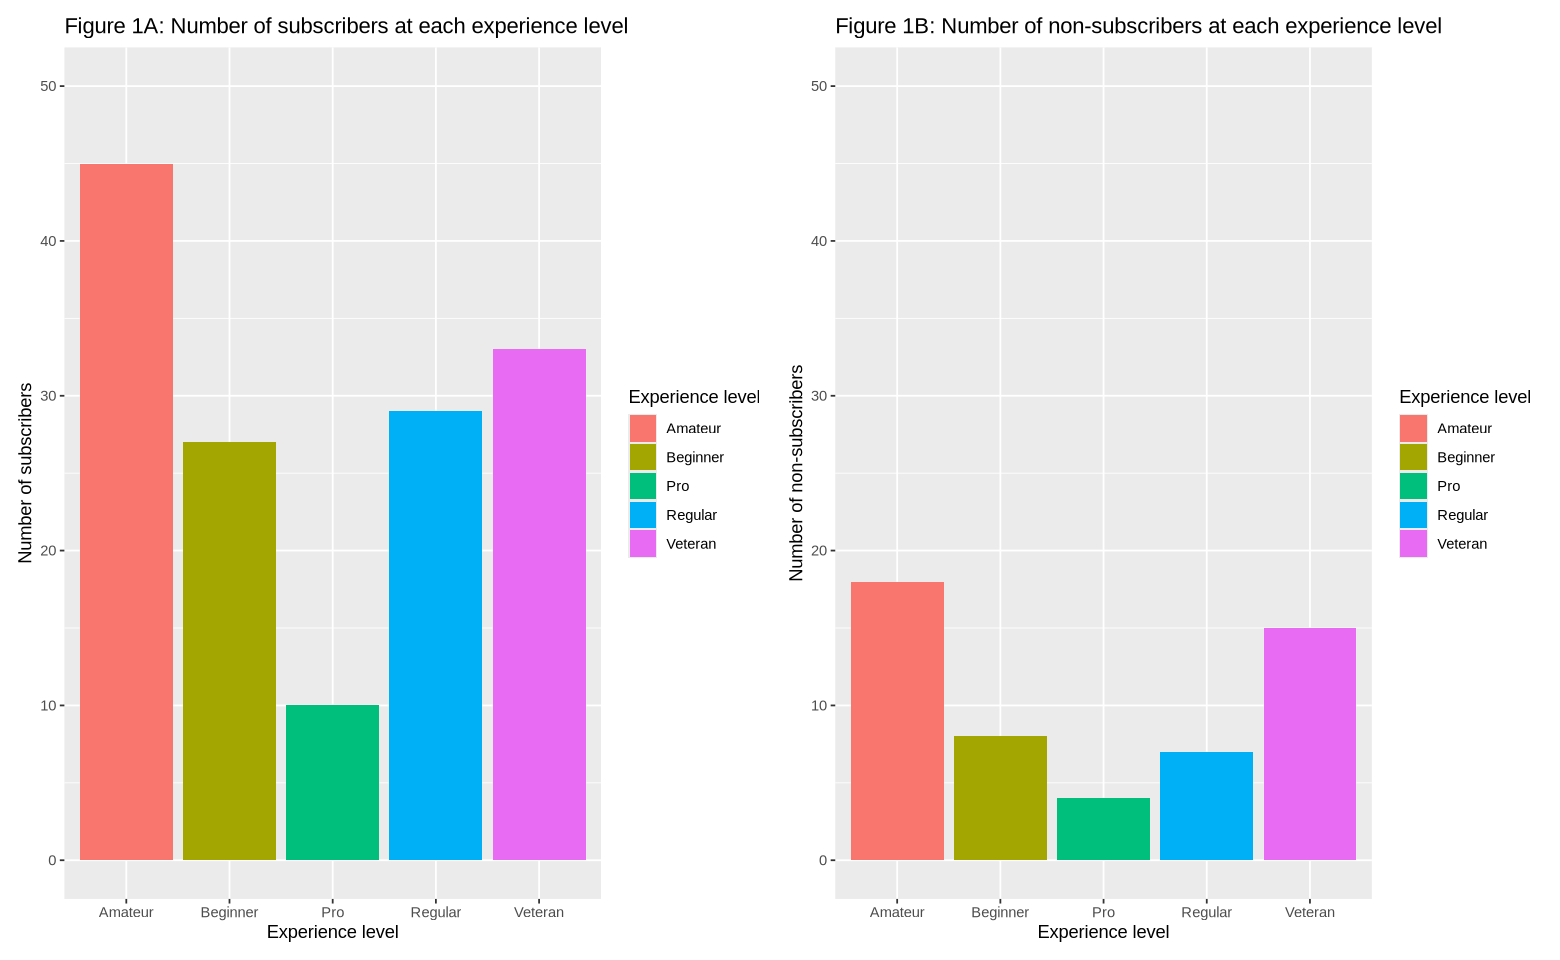

In [46]:
options(repr.plot.width = 13, repr.plot.height = 8)

subscribe_and_experience_plot1 = number_of_subscribers |>
    ggplot(aes(x = experience, y = yes_subscribed, fill = experience)) +
    geom_bar(stat = 'identity') +
    ylim(0, 50) +
    labs(x = 'Experience level', y = 'Number of subscribers', fill = 'Experience level') +
    ggtitle('Figure 1A: Number of subscribers at each experience level')

subscribe_and_experience_plot2 = number_of_subscribers |>
    ggplot(aes(x = experience, y = no_subscribed, fill = experience)) +
    geom_bar(stat = 'identity') +
    ylim(0, 50) +
    labs(x = 'Experience level', y = 'Number of non-subscribers', fill = 'Experience level') +
    ggtitle('Figure 1B: Number of non-subscribers at each experience level')

subscribe_and_experience_plot0 = subscribe_and_experience_plot1 + subscribe_and_experience_plot2

subscribe_and_experience_plot0

**Figure 1. Bar plot displaying number of (A) subscribers and (B) non-subscribers per experience level.** No linear correlation is found.  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


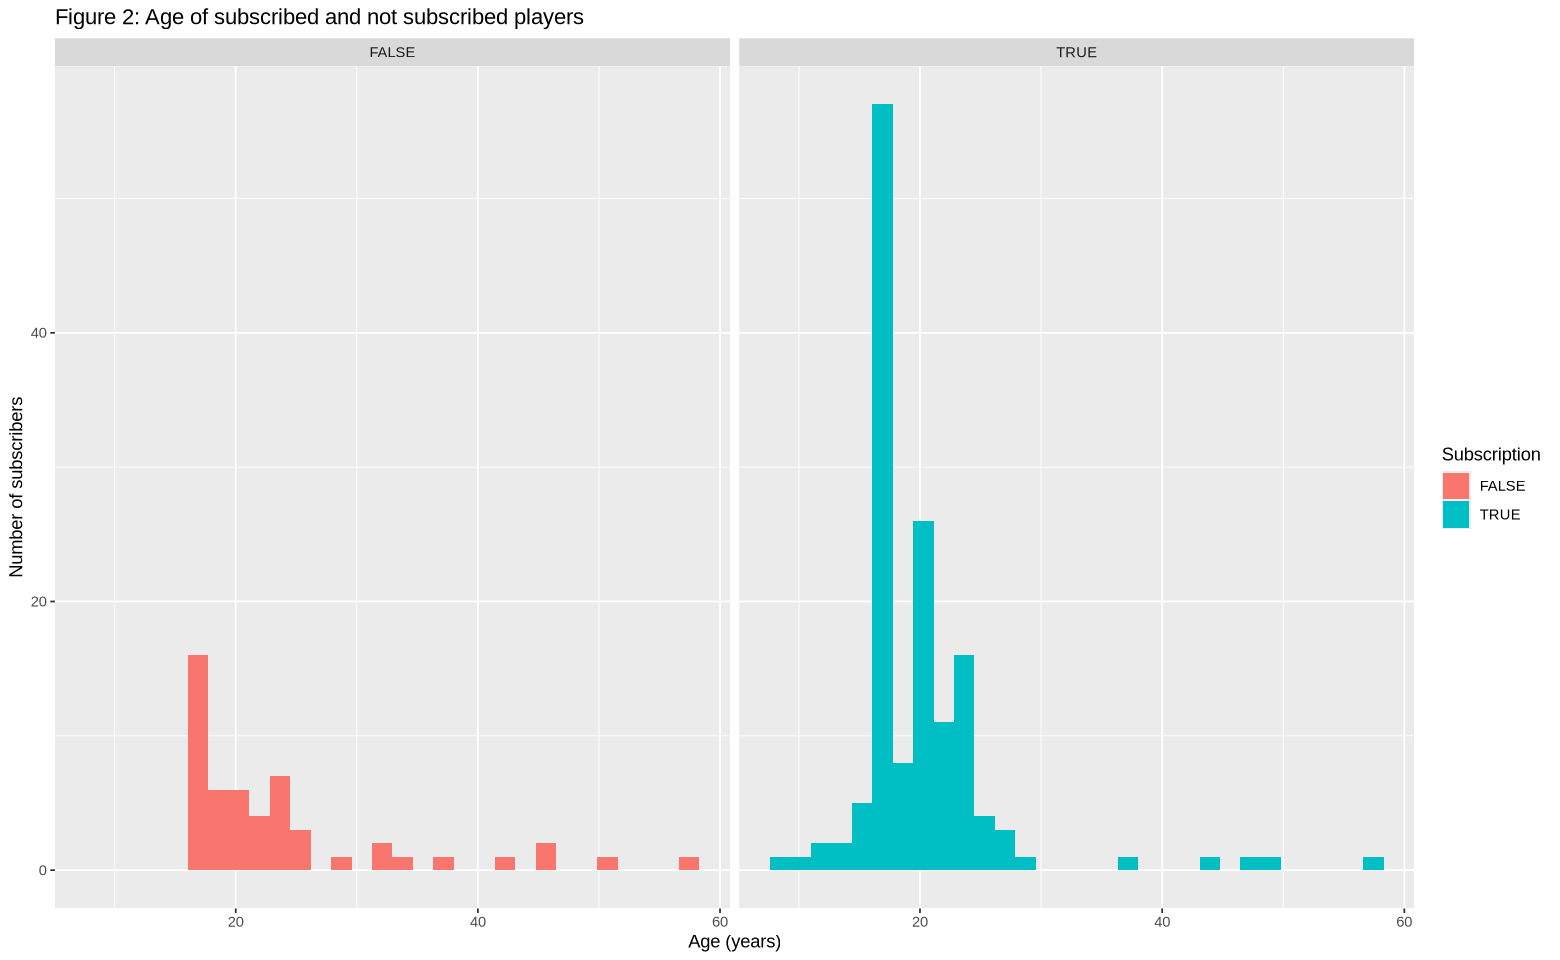

In [47]:
subscribe_vs_age = player_data |>
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_histogram() +
    facet_grid(cols = vars(subscribe)) +
    labs(x = 'Age (years)', y = 'Number of subscribers', fill = 'Subscription') +
    ggtitle('Figure 2: Age of subscribed and not subscribed players')
subscribe_vs_age

**Figure 2. Histogram displaying number of subscribers (True) and non-subscribers (False) across different ages.** No linear correlation is found. 

From the visualizations, we can see that the relationship between both predictors (age/experience) and the variable (subscriber status) is non-linear. Because of this relationship, linear models would struggle to make an accurate prediction. Additionally, as the target variable is categorical, the question requires a  classification model rather than regression. For these reasons, k-NN classification would be a suitable model as it it predicts values based off neighbouring points, regardless of the relationship of between predictor and target variable,  and is able to use multiple multiple predictors to classify.

Data Split, to train an accurate model and an accurate evaluation of its performace. 

In [48]:
player_split <- initial_split(player_order, prop = 0.75, strata = subscriber_status)  
player_train <- training(player_split)
player_test <- testing(player_split)

Recipe-preprocessing 

In [49]:
player_recipe <- recipe(subscriber_status ~ experience_level + Age, data = player_train) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors()) 
                


Model-classifier 

In [50]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
            set_engine("kknn") |>
            set_mode("classification")

Trained Workflow Object

In [51]:
player_fit <- workflow() |>
             add_recipe(player_recipe) |>
             add_model(knn_spec) |>
             fit(data = player_train)
player_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2413793
Best kernel: rectangular
Best k: 3

Predicitons

In [52]:
player_test_predictions <- predict(player_fit, player_test) |>
                          bind_cols(player_test)
player_test_predictions

.pred_class,Age,subscriber_status,experience,experience_level
<fct>,<dbl>,<fct>,<ord>,<dbl>
Not Subscribed,17,subscribed,Amateur,2
Not Subscribed,47,subscribed,Amateur,2
Not Subscribed,22,subscribed,Veteran,5
⋮,⋮,⋮,⋮,⋮
Not Subscribed,17,subscribed,Amateur,2
subscribed,24,Not Subscribed,Amateur,2
subscribed,22,subscribed,Amateur,2


Prediciton Accuracy 

In [53]:
player_prediction_accuracy <- player_test_predictions |>
                        metrics(truth = subscriber_status, estimate = .pred_class)
player_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.510204082
kap,binary,-0.008576329


Vfold Cross Validation + Metrics

In [54]:
set.seed(1) 
player_vfold <- vfold_cv(player_train, v = 5, strata = subscriber_status)

player_resample_fit <- workflow() |>
                      add_recipe(player_recipe) |>
                      add_model(knn_spec) |>
                      fit_resamples(resamples = player_vfold)

player_metrics <- player_resample_fit |> collect_metrics()
player_metrics


.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.6424138,5,0.02929817,Preprocessor1_Model1
roc_auc,binary,0.5376701,5,0.02568414,Preprocessor1_Model1


k-NN Model Tuning

In [55]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by =1))

knn_results <- workflow() |>
               add_recipe(player_recipe) |>
               add_model(knn_tune) |>
               tune_grid(resamples = player_vfold, grid = k_vals) |>
               collect_metrics()
knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4610673,5,0.03941328,Preprocessor1_Model01
1,roc_auc,binary,0.4962662,5,0.02238020,Preprocessor1_Model01
2,accuracy,binary,0.4893760,5,0.03589148,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
9,roc_auc,binary,0.5725070,5,0.02310483,Preprocessor1_Model09
10,accuracy,binary,0.7164204,5,0.03436095,Preprocessor1_Model10
10,roc_auc,binary,0.5667633,5,0.02288143,Preprocessor1_Model10


Visualization of Data Analysis

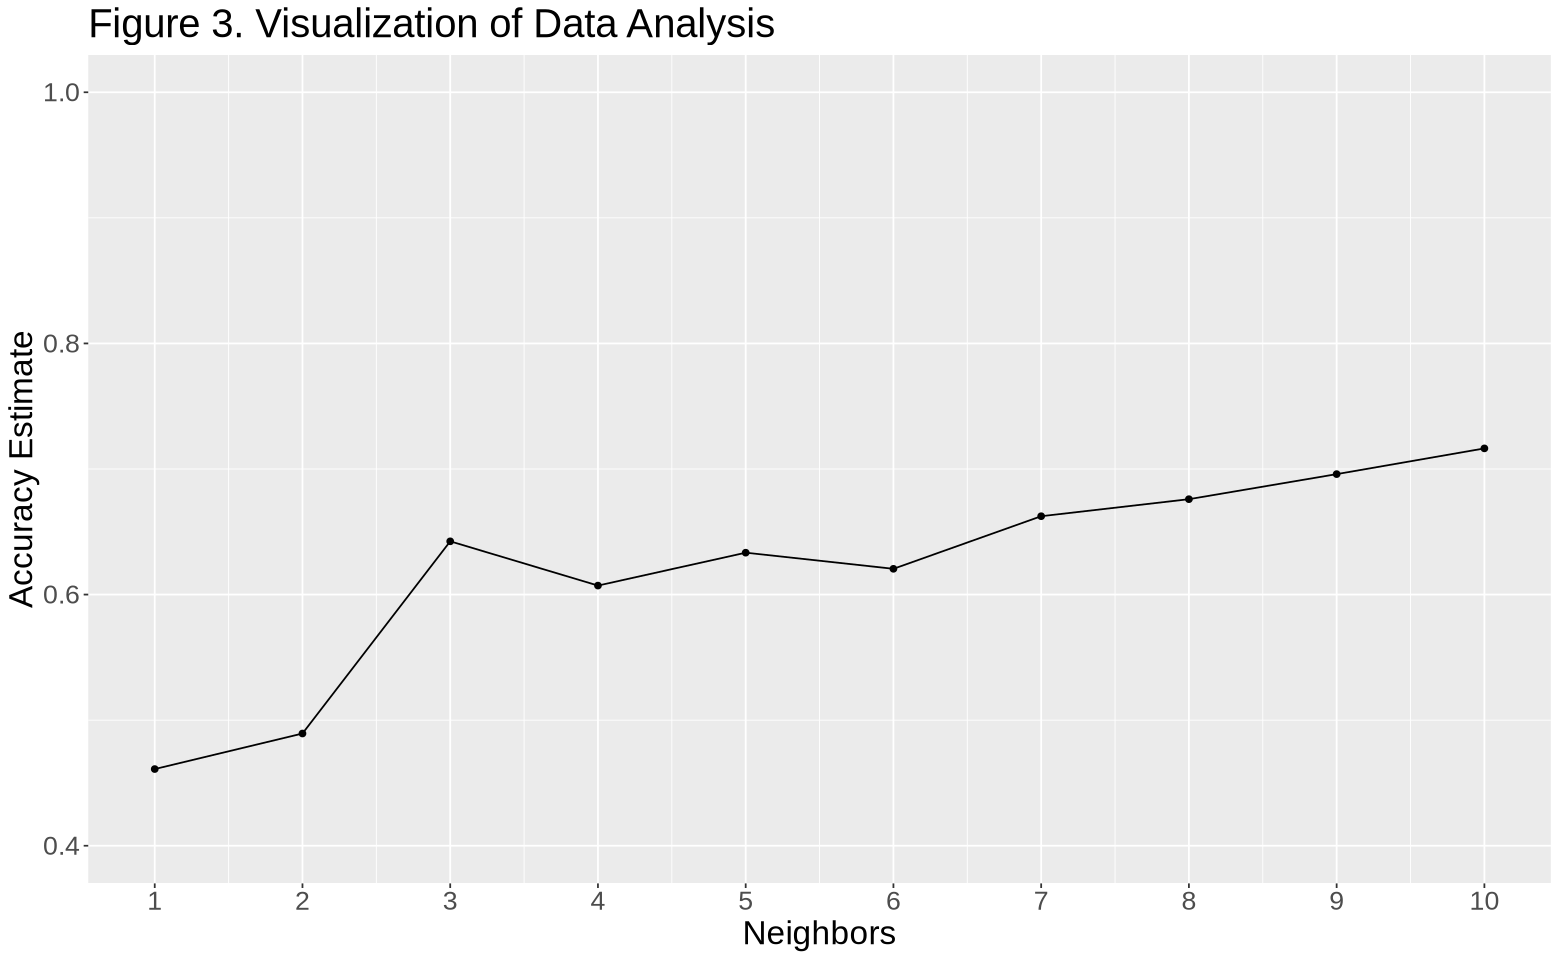

In [56]:
accuracies <- knn_results |>
              filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                     geom_point() +
                     geom_line() +
                     labs(title=("Figure 3. Visualization of Data Analysis"), x = "Neighbors", y = "Accuracy Estimate") +
                     theme(text = element_text(size = 20)) +
                     scale_x_continuous(breaks = seq(0, 14, by = 1)) +
                     scale_y_continuous(limits = c(0.4, 1.0))
accuracy_versus_k


**Figure 3. Cross validated accuracy estimates against different k values.** k=10 has the highest accuracy estimate, making it the optimal k.

Optimal K- technical reassurance

In [57]:
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 10

# Data Analysis With Optimal K

Tuned Accuracy 

In [59]:
knn_spec_tuned <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) |>
            set_engine("kknn") |>
            set_mode("classification")

player_fit_tuned <- workflow() |>
             add_recipe(player_recipe) |>
             add_model(knn_spec_tuned) |>
             fit(data = player_train)

player_test_predictions_tuned <- predict(player_fit_tuned, player_test) |>
                          bind_cols(player_test)
player_test_predictions_tuned

player_prediction_accuracy_tuned <- player_test_predictions_tuned |>
                        metrics(truth = subscriber_status, estimate = .pred_class)
player_prediction_accuracy_tuned


.pred_class,Age,subscriber_status,experience,experience_level
<fct>,<dbl>,<fct>,<ord>,<dbl>
subscribed,17,subscribed,Amateur,2
Not Subscribed,47,subscribed,Amateur,2
subscribed,22,subscribed,Veteran,5
⋮,⋮,⋮,⋮,⋮
subscribed,17,subscribed,Amateur,2
subscribed,24,Not Subscribed,Amateur,2
subscribed,22,subscribed,Amateur,2


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6938776
kap,binary,0.1522491


# Discussion 
Given the provided data in players.csv, Age and experience  were selected to predict whether an individual would subscribe to a video game related newsletter. subscriber_status data were mutated to factor and factor_recoded for TRUE = subscribed and FALSE = not_subscribed. experience was mutated from characters to numeric using frequency encoding from the package “forcats”. In figure 1A, the first two bar charts compare how many people subscribe versus don’t subscribe at different experience levels. For subscribers, the counts rise from Beginner to Amateur, dip at Pro, and rise again through Regular and Veteran, suggesting more experienced players are generally more likely to subscribe. In figure 1B, the non-subscriber chart shows a similar shape but with much lower counts overall, indicating that across all experience levels, there tend to be more subscribers than non-subscribers. Amateurs and Veterans stand out as the most represented groups in both charts. In figure 2, the age histograms show a striking contrast: non-subscribers are mostly younger, clustering in the mid-teens to mid-20s, with fewer older individuals. Subscribers, however, show a tighter concentration around the mid-20s, forming a clear peak near that age with a few scattered older players. Overall, subscribers appear older on average and less spread out, while non-subscribers span a broader and younger age range.


In this project, a k-Nearest Neighbors (k-NN) model was used to predict whether a player was a subscriber or a non-subscriber based on two variables: Age and experience_level. After the data was scaled and split into training and testing sets, the initial model produced low accuracy. A test accuracy of about 45% was observed, and the kappa value was negative, indicating that the model performed worse than random guessing. Because of this, tuning was carried out by testing K values from 1 to 10 using 5-fold cross-validation. As K increased, the average accuracy also increased. Accuracy rose from around 0.47 at K = 1 to about 0.74 at K = 10. The highest accuracy was achieved at K = 9. When this K value was applied to the test data, the accuracy improved to 75.5%, and the kappa value became positive, showing that the tuned model captured useful patterns that the default model could not. The results matched what is generally expected with k-NN models. Smaller K values tend to be too sensitive to noise in the dataset, especially when classes overlap, which was the case here. Very large K values can oversimplify decision boundaries. Since the dataset was small and the two classes showed considerable overlap, it was expected that the default K would not perform well. A gradual improvement in accuracy as K increased was also expected, and this trend was confirmed during tuning. The optimal value of K = 9 aligned with the idea that a moderate number of neighbors reduces noise while still allowing meaningful separation between classes. The findings suggest that Age and experience_level contain some signal related to subscription status, although not a strong one. The improvement after tuning highlights how sensitive k-NN is to the choice of K. Without tuning, the results would have suggested that no relationship existed at all. With tuning, the model performed noticeably better, which shows the importance of cross-validation and parameter selection when using distance-based methods.
Several limitations were observed. Only two predictors were used in the model, and both were simple demographic variables. Subscription behavior is likely influenced by many factors that were not included, such as playtime, engagement, or in-game purchases. The dataset itself was also small, with fewer than 200 observations, which can increase noise and reduce reliability. Considerable overlap between subscribers and non-subscribers was seen in the feature space, making separation difficult for any classifier. Furthermore, experience_level was originally a character variable that had to be encoded numerically, which may not perfectly reflect the true relationships among categories. Since k-NN relies on distances, this encoding could have affected the results.

Several questions were raised for future work. It should be explored whether adding more predictors, such as session counts, total playtime, or engagement metrics, would improve accuracy. Other models, including logistic regression, decision trees, random forests, or gradient boosting, could be tested to determine whether they capture patterns that k-NN misses. The stability of K = 9 across different data splits could also be examined through repeated cross-validation. Feature engineering or dimensionality reduction techniques such as PCA may help separate the classes more clearly. If class imbalance is present, oversampling, undersampling, or SMOTE could be applied. Clustering techniques may also be helpful in identifying meaningful groups of players. Overall, although tuning the K value improved accuracy from 0.45 to 0.76, the model still showed only moderate performance, indicating that additional variables and perhaps different modeling techniques may be needed to better predict subscription status.

*On a side note, At the time of writing this the optimal k value found was 10. However, after running the entire code several times, the k value will sometimes change. The value has also been seen to be either 7 or 9, but it is typically 10. Our group has reached the 

# Reference
factor function - RDocumentation. (n.d.). https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/factor